# PHAS0030 Assignment Week 4: Investigating the Energy and Eigenstates for the Particle in a Box

In this notebook we will use the NumPy, SciPy, and Matplotlib libraries in order to find the energy and eigenstates for the particle in a box. By both solving the Schrödinger equation as a boundary value problem with numerical merthods and implementing the known analytical solution on a grid.

In this notebook we will be using atomic units. Which implies that the following constants are

$$
m_e = \hbar = 1
$$

This condition implies that distance is measured in Bohr radii and energy measured in Hartrees.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

The Schrödinger equation in this notebook is

$$
-\frac{1}{2} \frac{d^2}{dx^2} \psi(x) = E \psi(x)
$$

We will be re-writing this equation in the following form

$$
\frac{d \psi}{dx} = \phi
$$

$$
\frac{d \phi}{dx} = -2 E \psi
$$

with our $ x $ holding values from 0 to 1.

For this notebook it is important to note the only vlaues of $ E $ which correspond to the eigenstates of the system will match the necessary boundary condition of 

$$
\psi(x = 1) = 0
$$


### 1. Implementing Schrödinger equation

Writing the Schrödinger equation in 2 first order ODEs form and then implementng that in to a function.

In [14]:
def RHS_Schro(y,E):
    """
    Implement RHS of Schrodinger equation
    
    Input:
    y  input values (two component array)
    E  Energy
    Output:
    Differentials (two component array)
    """
    # Separate input
    psi = y[0]
    phi = y[1]
    
    # Calculate differentials
    dpsi = phi
    dphi = -2*E*psi
    
    return np.array((dpsi,dphi))

### 2. RK4 solver

In [15]:
def RK4_solver(fun,y_0,dx,E,N):
    """
    Solve dy/dt = fun(y,t) using fourth-order RK method.
    
    Inputs:
    fun  f(y,t)
    y_0   Initial condition - assumed to be two-component
    dx   Spacing in x
    E    Parameter to pass to fun
    N    Number of steps
    
    Returns:
    two arrays of length N+1 (x and v or equivalent)
    """
    y = np.zeros((N, 2))
    y[0] = y_0
    t_n = 0
    
    for i in range(N-1):
        
        k_1 = dx*fun(y[i], E)
        k_2 = dx*fun(y[i] + (k_1/2), E)
        k_3 = dx*fun(y[i] + (k_2/2), E)
        k_4 = dx*fun(y[i] + k_3, E)
        y[i + 1] = y[i] + ((k_1 + 2*k_2 + 2*k_3 + k_4)/6)
    
    return y

### 3. Test for E=1

The initial conditions are $ \psi = 0 $ and $ \phi = a $, where $ a $ is any non zero value. In this case we have chosen $ a = 1 $.

[0.69682677 0.16989676]


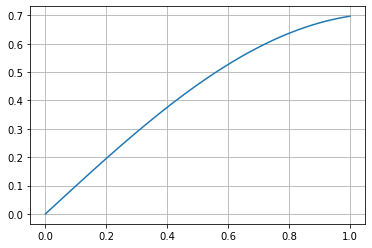

In [16]:
# Setting Initial Conditions and Arguments
dx = 0.01
E_0 = 1
a = 1
psi_0 = 0
phi_0 = a
y_0 = np.array((psi_0, phi_0))
N = 100

# Calling our RK4 function to return array of approximated values for Psi
SCHRO = RK4_solver(RHS_Schro,y_0,dx,E_0,N)
print(SCHRO[-1])
#
x = np.linspace(0, len(SCHRO[:,0])*dx, N)
plt.plot(x, SCHRO[:,0])
plt.grid()


### 4. Bisection

In here we have implemented a bisecton procedure to solve for the correct value of $ E $, in the ground state, satisfying our boundary condition $ \psi(1) = 0 $

In [17]:
# Setting tolerance for bisection
tol = 0.000001

# x value of Psi value we want to extract from our returned array
x_find = 1
N_find = int(x_find/dx) - 1


### Lower limit ###
# Energy
E_low = 1.0
# Value when put into wavefunction
psi_low = RK4_solver(RHS_Schro,y_0,dx,E_low,N)[N_find, 0]


### Upper limit ###
E_high = 11.0
psi_high = RK4_solver(RHS_Schro,y_0,dx,E_high,N)[N_find, 0]


### Midpoint ###
E_mid = (E_low + E_high)/2
psi_mid = RK4_solver(RHS_Schro,y_0,dx,E_mid,N)[N_find, 0]

# Initialising counter
i = 0

# Bisection Procedure
while abs(psi_mid) > tol:
    
    i += 1
    
    if psi_low*psi_mid > 0:
        
        E_low = E_mid 
    
    else:
        
        E_high = E_mid

    E_mid = (E_low + E_high)/2
    psi_mid = RK4_solver(RHS_Schro,y_0,dx,E_mid,N)[N_find, 0]

In [18]:
print("The energy value from our bisection routine " + str(E_mid))
print("The number of itterations from our bisection routine " + str(i))

#Setting energy value found from bisection as new variable for next question
E_wave = E_mid

The energy value from our bisection routine 5.034996032714844
The number of itterations from our bisection routine 17


### 5. Normalise and plot

To normalise our wave function you need to evaluate the integral

$$
A = \int^1_0{|\psi(x)|^2 dx}
$$

using the value $ A $ to find the normalied wave function $ \psi_{N}(x) $ with the formula

$$
\psi_{N}(x) = \frac{\psi(x)}{\sqrt{A}}
$$

The normalisation factor is  0.22282875441684827


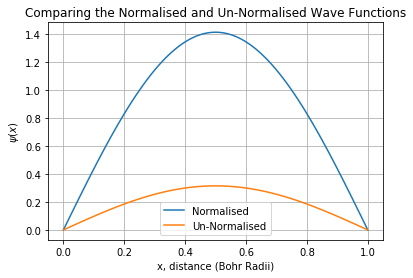

In [19]:
# Extracting whole column of Psi values for Energy value calculated in Q.4.
wave_fun = RK4_solver(RHS_Schro,y_0,dx,E_wave,N)[:,0]

# Normalising Approximated Psi
wave_fun_sqrd_abs = abs(wave_fun)**2
norm = integrate.simps(wave_fun_sqrd_abs, x)**0.5
print("The normalisation factor is ",norm)
wave_fun_norm = wave_fun/norm

# Plotting both Wave Functions
plt.plot(x, wave_fun_norm, label="Normalised")
plt.plot(x, wave_fun, label="Un-Normalised")
plt.xlabel("x, distance (Bohr Radii)")
plt.ylabel(r"$\psi(x)$")
plt.title("Comparing the Normalised and Un-Normalised Wave Functions")
plt.grid()
plt.legend()
plt.show()

### 6. Compare to analytic wavefunction

In [20]:
# Creating and normalising analytical solution
k = np.pi
B = 1
psi_ana = B*np.sin(k*x)
psi_ana_sqrd_abs = abs(psi_ana)**2
norm = integrate.simps(psi_ana_sqrd_abs, x, dx)**0.5
print("The normalisation factor is ",norm)
psi_ana_norm = psi_ana/norm

# Creating array with difference between the analytic and aprroximate solutions
diff_psi = psi_ana_norm - wave_fun_norm

The normalisation factor is  0.7071079795312555


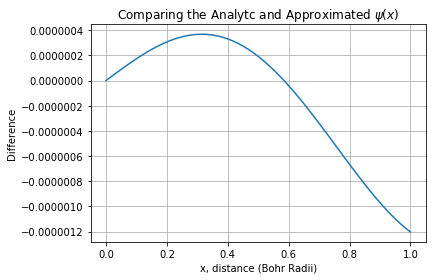

In [21]:
# Plotting the difference between the analytic and aprroximate solutions
plt.plot(x, diff_psi)
plt.xlabel("x, distance (Bohr Radii)")
plt.ylabel("Difference")
plt.title(r"Comparing the Analytc and Approximated $ \psi(x) $")
plt.grid()
plt.show()

### Brief conclusions/commentary

After experimenting with multiple values for the tolerance it seems that as we set our tolerance lower and lower not only does the range in the difference values get smaller, but the function also seems to become more sinusoidal, atleast in our range of $ x $ values.

This notebook shows that the RK4 method s very powerful and able to get very accurate results for a very non-significant amount of itterations which is very impressive.

# Comments

### Intro/Conclusion and comparison to analytic solution
* Nice intro and conclusion. 

Marks = 10/10
### Setting up the RHS of the Schrodinger Equation
  
  
  
  
  
* The Schrodinger Eq looks correctly set up.

Marks = 10/10
### Bisection
* The energy you get from the bisection is a bit higher than the analytic energy for  a particle in a box which is 0.5*np.pi^2. Check bisection again.



Mark = 8/10
